# Data Visualization Assignment 1- Manas Chopra

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,19-03-16,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,19-03-16,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,19-03-16,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,19-03-16,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,19-03-16,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


In [4]:
df.shape

(107619, 9)

In [5]:
type(df['report_date'][1])

str

In [6]:
type(df['value'][0])

str

In [7]:
df['report_date']=pd.to_datetime(df['report_date'],format='%d-%m-%y',errors='coerce')

In [8]:
df['value']=pd.to_numeric(df['value'],errors='coerce')

In [9]:
df.head()

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0.0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0.0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2.0,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1.0,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127.0,cases


In [10]:
df.isnull().sum()

report_date            247
location                 7
location_type            7
data_field               7
data_field_code          7
time_period         107619
time_period_type    107619
value                  141
unit                     7
dtype: int64

In [11]:
df.columns

Index(['report_date', 'location', 'location_type', 'data_field',
       'data_field_code', 'time_period', 'time_period_type', 'value', 'unit'],
      dtype='object')

In [12]:
df.drop(['time_period','time_period_type'],axis=1,inplace=True)

In [13]:
df.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0.0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0.0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2.0,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1.0,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127.0,cases


In [14]:
df['value'].fillna(df['value'].mean,inplace=True)

In [15]:
df.dropna(inplace=True,axis=0)

In [16]:
df.isnull().sum()

report_date        0
location           0
location_type      0
data_field         0
data_field_code    0
value              0
unit               0
dtype: int64

### Q1 - show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration

In [17]:
df[(df['data_field_code']=='AR0005')&(df['location']=='Argentina-Catamarca')]['value']

16      14
160     15
304     15
448     15
592     15
736     15
880     16
1024    15
1168    16
1312    15
1456    15
1600    15
1744    15
1888    16
Name: value, dtype: object

### Q2- Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for entire duration to identify the difference   

In [18]:
df_diff=df[((df['location']=='Argentina-CABA')|(df['location']=='Argentina-Catamarca'))&(df['unit']=='cases')][['location','report_date','value']].groupby(['report_date','location']).sum()

In [19]:
df_diff=df_diff.unstack()

Text(0.5,1,"Difference b/w 'Argentina-CABA' and 'Argentina-Catamarca'")

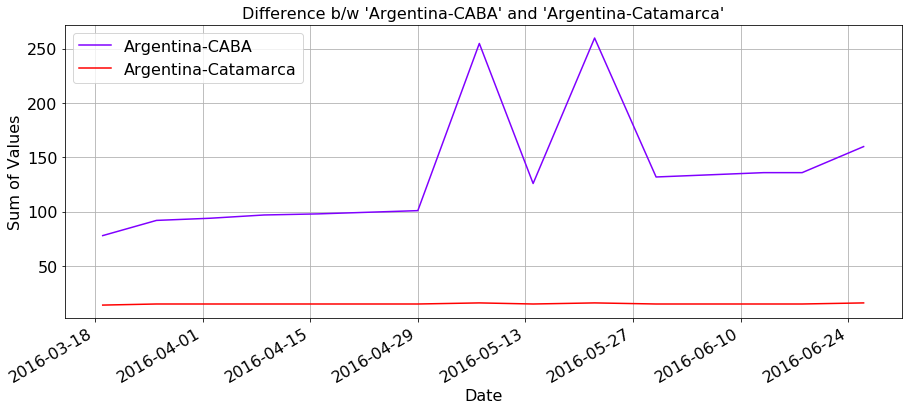

In [20]:
df_diff.plot(kind='line',figsize=(15,6),fontsize=16,colormap='rainbow').grid()
plt.xlabel("Date", fontsize=16)
plt.ylabel("Sum of Values", fontsize=16)
plt.legend(['Argentina-CABA','Argentina-Catamarca'],loc=2, prop={'size': 16})
plt.title("Difference b/w 'Argentina-CABA' and 'Argentina-Catamarca'", fontsize=16)

Text(0.5,1,'Total Value Counts')

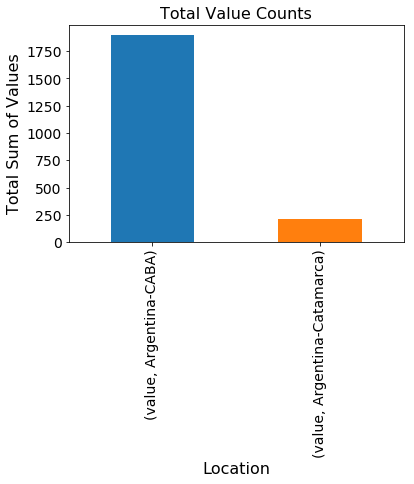

In [21]:
df_diff.sum().plot(kind='bar',fontsize=14)
plt.xlabel("Location", fontsize=16)
plt.ylabel("Total Sum of Values", fontsize=16)
plt.title('Total Value Counts', fontsize=16)

### Q3 - Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'.

In [22]:
df.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases


In [23]:
df_plot3=df[(df['location']=='Argentina-Buenos_Aires')|(df['location']=='Argentina-CABA')|(df['location']=='Argentina-Catamarca')][['location','data_field','value']].groupby(['location','data_field']).sum()

Text(0.5,1,'Distribution of Data Field values acoss various locations')

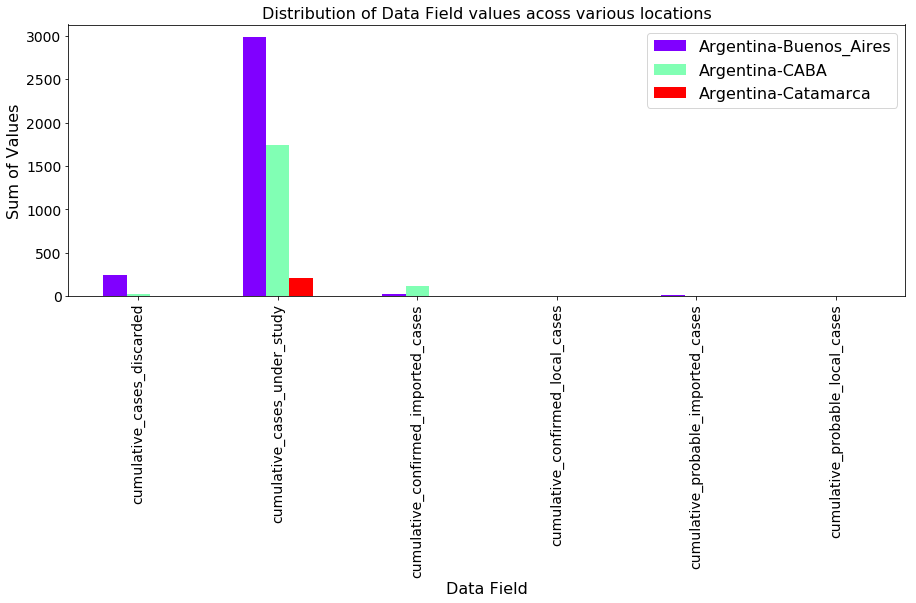

In [24]:
df_plot3.unstack(0).plot(kind='bar',figsize=(15,5),fontsize=14,colormap='rainbow')
plt.xlabel("Data Field", fontsize=16)
plt.ylabel("Sum of Values", fontsize=16)
plt.legend(['Argentina-Buenos_Aires','Argentina-CABA','Argentina-Catamarca'],loc=1, prop={'size': 16})
plt.title("Distribution of Data Field values acoss various locations", fontsize=16)

### Q4 - Build a program to predict the correct word for wrongly typed word. for example whst => what, numbr =>number, good => good

In [25]:
import re

In [26]:
with open('big.txt','r') as f:
    #f.seek(0)
    lines=f.readlines()

In [27]:
lines

['The Project Gutenberg EBook of The Adventures of Sherlock Holmes\n',
 'by Sir Arthur Conan Doyle\n',
 '(#15 in our series by Sir Arthur Conan Doyle)\n',
 '\n',
 'Copyright laws are changing all over the world. Be sure to check the\n',
 'copyright laws for your country before downloading or redistributing\n',
 'this or any other Project Gutenberg eBook.\n',
 '\n',
 'This header should be the first thing seen when viewing this Project\n',
 'Gutenberg file.  Please do not remove it.  Do not change or edit the\n',
 'header without written permission.\n',
 '\n',
 'Please read the "legal small print," and other information about the\n',
 'eBook and Project Gutenberg at the bottom of this file.  Included is\n',
 'important information about your specific rights and restrictions in\n',
 'how the file may be used.  You can also find out about how to make a\n',
 'donation to Project Gutenberg, and how to get involved.\n',
 '\n',
 '\n',
 '**Welcome To The World of Free Plain Vanilla Electronic 

In [28]:
#Extracting words from the list of lines
words=[]
for i in lines:
    re.sub("[^a-zA-Z0-9-]", "",i)
    line_list=i.strip("\n").split(" ")
    for z in line_list:
        words.append(z)

In [29]:
len(words)

1164968

In [30]:
words=list(set(words)) #Removing the duplicate words
len(words)

81410

In [31]:
import difflib

def find_correct_word(err_word):
    closest_matches=difflib.get_close_matches(err_word,words,4)
    #print(closest_matches)
    #for k in closest_matches:
        #print(difflib.SequenceMatcher(None, err_word,k).ratio())
    return closest_matches[0]

def print_correct(s):
    for i in s.split():
        if i in words:
            print(i,end=" ")
        else:
            print(find_correct_word(i),end=" ")

try:
    s=input("Enter a word : ")
    print_correct(s)
except Exception as e:
    print("The word can`t be corrected, Try again!!! ")

Enter a word : whsn
when 

In [32]:
try:
    s=input("Enter a word : ")
    print_correct(s)
except:
    print("The word can`t be corrected, Try again!!!")

Enter a word : crokery
crockery 

In [33]:
try:
    s=input("Enter a word : ")
    print_correct(s)
except:
    print("The word can`t be corrected, Try again!!!")

Enter a word : numbr
number 

In [34]:
try:
    s=input("Enter a word : ")
    print_correct(s)
except:
    print("The word can`t be corrected, Try again!!!")

Enter a word : good
good 

In [35]:
try:
    s=input("Enter a word : ")
    print_correct(s)
except:
    print("The word can`t be corrected, Try again!!!")

Enter a word : stilish
stylish 

In [36]:
try:
    s=input("Enter a word : ")
    print_correct(s)
except:
    print("The word can`t be corrected, Try again!!!")

Enter a word : fligt
flight 

In [37]:
try:
    s=input("Enter a word : ")
    print_correct(s)
except:
    print("The word can`t be corrected, Try again!!!")
    
#In this example: the library difflib matches 'whst' and 'what' at 4th rank, the best match is 'whist'
#The top 4 closest matches are : ['whist', 'whilst', 'whit', 'what']

Enter a word : whst
whist 